In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('carEvaluation.csv',header=None)

In [3]:
data.shape

(1731, 7)

In [4]:
data.head()

,0,1,2,3,4,5,6
0,buying,maint,persons,lug_boot,doors,safety,car
1,discrete,discrete,discrete,discrete,discrete,discrete,discrete
2,NaN,NaN,NaN,NaN,NaN,NaN,class
3,vhigh,vhigh,2,small,2,low,unacc
4,vhigh,vhigh,2,small,2,med,unacc


In [5]:
col_names= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,persons,lug_boot,doors,safety,car
1,discrete,discrete,discrete,discrete,discrete,discrete,discrete
2,NaN,NaN,NaN,NaN,NaN,NaN,class
3,vhigh,vhigh,2,small,2,low,unacc
4,vhigh,vhigh,2,small,2,med,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1730 non-null   object
 1   maint     1730 non-null   object
 2   doors     1730 non-null   object
 3   persons   1730 non-null   object
 4   lug_boot  1730 non-null   object
 5   safety    1730 non-null   object
 6   class     1731 non-null   object
dtypes: object(7)
memory usage: 94.8+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(data[col].value_counts())

vhigh       432
high        432
low         432
med         432
discrete      1
buying        1
Name: buying, dtype: int64
vhigh       432
high        432
low         432
med         432
discrete      1
maint         1
Name: maint, dtype: int64
4           576
more        576
2           576
discrete      1
persons       1
Name: doors, dtype: int64
small       576
med         576
big         576
discrete      1
lug_boot      1
Name: persons, dtype: int64
5more       432
3           432
4           432
2           432
discrete      1
doors         1
Name: lug_boot, dtype: int64
high        576
low         576
med         576
safety        1
discrete      1
Name: safety, dtype: int64
unacc       1210
acc          384
good          69
vgood         65
discrete       1
class          1
car            1
Name: class, dtype: int64


In [9]:
data['class'].value_counts()

unacc       1210
acc          384
good          69
vgood         65
discrete       1
class          1
car            1
Name: class, dtype: int64

In [10]:
data.isnull().sum()

buying      1
maint       1
doors       1
persons     1
lug_boot    1
safety      1
class       0
dtype: int64

In [11]:
data.dropna(subset=["buying"],inplace=True)

In [12]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
x=data.drop(['class'],axis=1)
y=data['class']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
x_train.shape,x_test.shape

((1159, 6), (571, 6))

In [16]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
49,vhigh,vhigh,more,small,3,med
469,high,vhigh,2,big,3,med
156,vhigh,high,more,small,3,low
1724,low,low,more,small,5more,high
1209,med,low,more,small,2,low


In [18]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [19]:
X_train=encoder.fit_transform(x_train)
X_test=encoder.fit_transform(x_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
49,1,1,1,1,1,1
469,2,1,2,2,1,1
156,1,2,1,1,1,2
1724,3,3,1,1,2,3
1209,4,3,1,1,3,2


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [23]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini=clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7636


In [26]:
y_pred_train_gini=clf_gini.predict(X_train)
y_pred_train_gini

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'acc'], dtype=object)

In [27]:
print('Training-set accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train,y_pred_train_gini)))

Training-set accuracy score with criterion gini index: 0.7783


In [28]:
#chech for overfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 0.7783
Test set score: 0.7636


[Text(306.90000000000003, 380.52, 'X[5] <= 2.5\ngini = 0.453\nsamples = 1159\nvalue = [252, 1, 1, 48, 817, 40]'),
 Text(167.4, 271.8, 'X[5] <= 1.5\ngini = 0.304\nsamples = 776\nvalue = [113, 0, 0, 26, 637, 0]'),
 Text(111.60000000000001, 163.07999999999998, 'X[2] <= 1.5\ngini = 0.5\nsamples = 387\nvalue = [113, 0, 0, 26, 248, 0]'),
 Text(55.800000000000004, 54.360000000000014, 'gini = 0.592\nsamples = 126\nvalue = [57, 0, 0, 14, 55, 0]'),
 Text(167.4, 54.360000000000014, 'gini = 0.405\nsamples = 261\nvalue = [56, 0, 0, 12, 193, 0]'),
 Text(223.20000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 389\nvalue = [0, 0, 0, 0, 389, 0]'),
 Text(446.40000000000003, 271.8, 'X[2] <= 2.5\ngini = 0.633\nsamples = 383\nvalue = [139, 1, 1, 22, 180, 40]'),
 Text(334.8, 163.07999999999998, 'X[2] <= 1.5\ngini = 0.526\nsamples = 248\nvalue = [61, 0, 0, 9, 158, 20]'),
 Text(279.0, 54.360000000000014, 'gini = 0.652\nsamples = 124\nvalue = [61, 0, 0, 9, 34, 20]'),
 Text(390.6, 54.360000000000014, 'gi

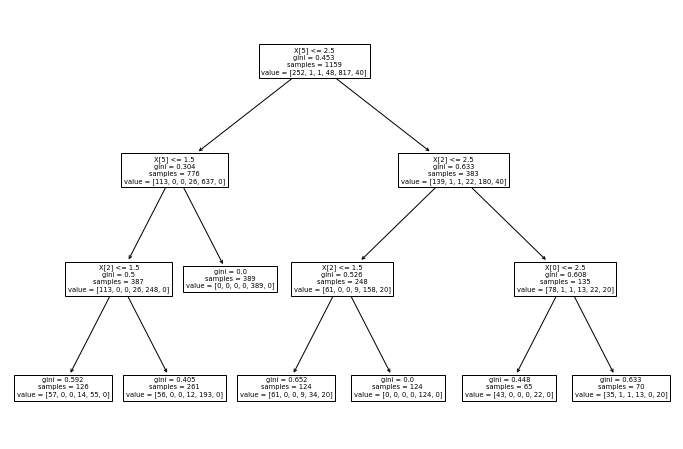

In [29]:
plt.figure(figsize=(12,8))
from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train))

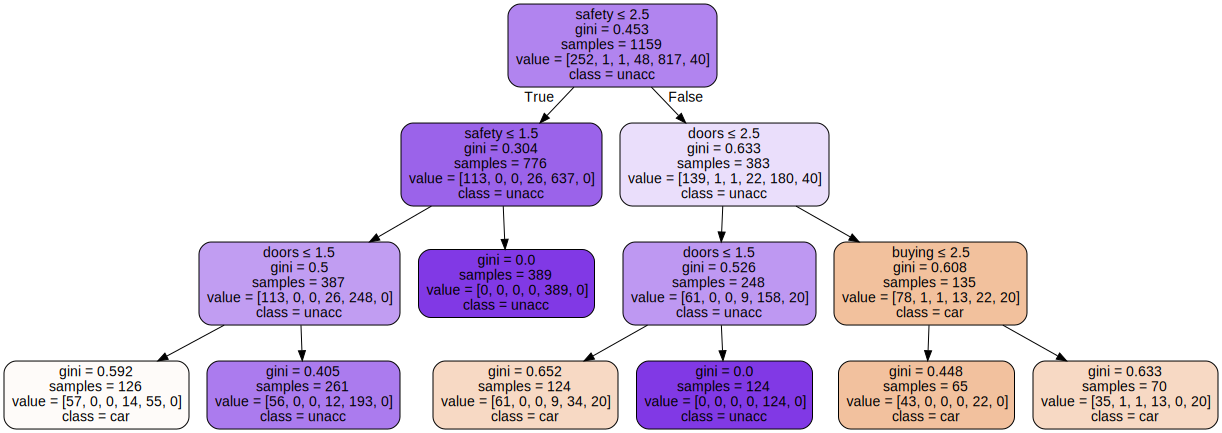

In [30]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

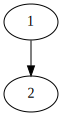